#Predicting Movie Ratings

Mean Squared Error: 0.3941690127300468
Root Mean Squared Error: 0.6278288084582029
R-squared: 0.26228715244105083


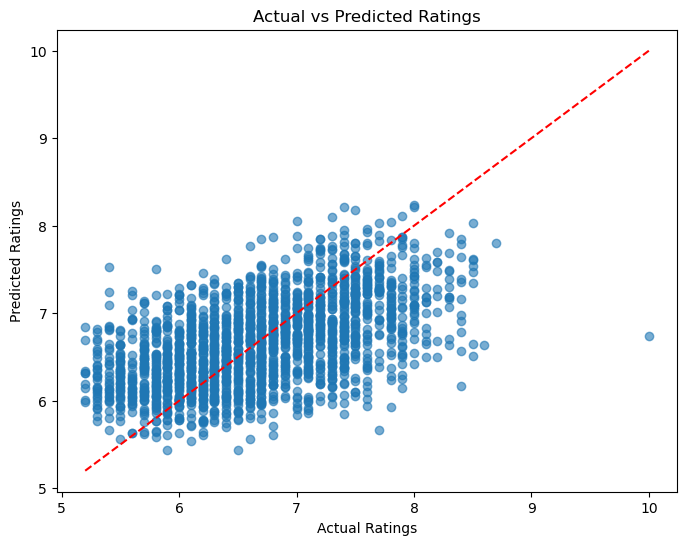

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('10000 Movies Data')
# Data Preprocessing
# Handle missing values by dropping rows with missing 'vote_average' or other important features
df = df.dropna(subset=['vote_average', 'Budget', 'Revenue', 'Genres'])
# Feature Engineering
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year
# Encode categorical columns like genre
label_encoder = LabelEncoder()
df['Genre_encoded'] = label_encoder.fit_transform(df['Genres'])
# Optionally: Create a new feature like the 'budget-to-revenue ratio' (this can be informative)
df['Budget_to_Revenue'] = df['Budget'] / (df['Revenue'] + 1)  # Adding 1 to avoid division by zero

# Select features and target
features = ['Budget', 'Revenue', 'year', 'Genre_encoded', 'Budget_to_Revenue']
target = 'vote_average'

X = df[features]  # Features
y = df[target]    # Target variable (vote_average)
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building: Using RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the ratings on the test set
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Plotting the actual vs predicted rating
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()


#Classification Models

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('10000 Movies Data')

# Data Preprocessing
# Handle missing values by dropping rows with missing target columns
df = df.dropna(subset=['Budget', 'Revenue', 'Genres'])

# Create a new column 'hit_or_flop' based on revenue to budget ratio
df['hit_or_flop'] = np.where(df['Revenue'] >= 1.5 * df['Budget'], 1, 0)  # 1 for hit, 0 for flop

# Encode 'genre' column into numerical values
label_encoder = LabelEncoder()
df['Genre_encoded'] = label_encoder.fit_transform(df['Genres'])

# Select features (budget, revenue, runtime, year, genre_encoded)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

features = ['Budget', 'Revenue', 'popularity', 'vote_average']
target = 'hit_or_flop'

X = df[features]  # Features
y = df[target]    # Target (hit_or_flop)

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Example: Predict if a new movie is a hit or flop
new_movie = np.array([[100000000, 100000000, 22.150	, 8.6]])  # Example data
prediction = model.predict(new_movie)
result = "Hit" if prediction[0] == 1 else "Flop"
print(f"The new movie is a: {result}")


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1337
           1       1.00      1.00      1.00       659

    accuracy                           1.00      1996
   macro avg       1.00      1.00      1.00      1996
weighted avg       1.00      1.00      1.00      1996


Confusion Matrix:
[[1337    0]
 [   0  659]]
The new movie is a: Flop


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#Recommendation System

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
movies = pd.read_csv('10000 Movies Data')  # Assuming your dataset is in CSV format

# Preprocessing (removing missing values in the overview and title columns)
movies = movies.dropna(subset=['overview', 'title'])

# TF-IDF Vectorizer to convert movie overviews into feature vectors
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['overview'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend movies based on a movie title
def recommend_movies(title, cosine_sim=cosine_sim):
    idx = movies.index[movies['title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 most similar movies
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar movie titles
    return movies['title'].iloc[movie_indices]

# Example usage:
recommended_movies = recommend_movies('The Dark Knight')
print(recommended_movies)


1080       Batman: The Long Halloween, Part One
1175       Batman: The Long Halloween, Part Two
689                       The Dark Knight Rises
2501                                     Batman
5142                   Batman: The Killing Joke
341     Batman: The Dark Knight Returns, Part 2
9697                             Batman Forever
794                                  The Batman
646                  Batman: Under the Red Hood
4634                 Batman: Gotham by Gaslight
Name: title, dtype: object
